<a href="https://colab.research.google.com/github/akshaypat444/tensorflow_practice/blob/main/05_transfer_learning_fine_tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt



## Creating helpful functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-03-03 20:15:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-03-03 20:15:11 (93.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

## Get data
**Using inbuild pretrained models from `tf.keras.applications`**

In [ ]:
# Get 10% of traning data of food class

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2024-03-03 20:15:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.207, 142.251.162.207, 173.194.212.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   186MB/s    in 0.9s    

2024-03-03 20:15:13 (186 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent

## Setup data

In [ ]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
IMG_SIZE=(224,224)
BATCH_SIZE=32

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                               batch_size=BATCH_SIZE,
                                                               image_size=IMG_SIZE,
                                                               shuffle=True,
                                                               label_mode="categorical")


test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               batch_size=BATCH_SIZE,
                                                               image_size=IMG_SIZE,
                                                               shuffle=True,
                                                               label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

## Keras Functional API - Can create more complex models
**Keras Functional API vs Sequential API**
`base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)`

## Model 0: Using keras functional api

In [ ]:
# Create base model with tf.keras.application
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# Freeze the base model (weights are not updated during training)
base_model.trainable = False

# Creat inputs into model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# Normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# Pass the inputs to the base_model
x = base_model(inputs)

# Average Pool
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x)

# Create the ouput activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# Combine the inputs and outputs
model_0 = tf.keras.Model(inputs, outputs)

# Compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_model_0 = model_0.fit(train_data, epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=int(0.25 * len(test_data)),
                              callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                     experiment_name="10% feature extraction")])

Saving TensorBoard log files to: transfer_learning/10% feature extraction/20240303-201605
Epoch 1/5
24/24 [==============================] - 97s 4s/step - loss: 1.9190 - accuracy: 0.3840 - val_loss: 1.3384 - val_accuracy: 0.7105
Epoch 2/5
24/24 [==============================] - 84s 4s/step - loss: 1.1610 - accuracy: 0.7440 - val_loss: 0.9102 - val_accuracy: 0.8191
Epoch 3/5
24/24 [==============================] - 82s 3s/step - loss: 0.8537 - accuracy: 0.8080 - val_loss: 0.7381 - val_accuracy: 0.8257
Epoch 4/5
24/24 [==============================] - 81s 3s/step - loss: 0.7035 - accuracy: 0.8547 - val_loss: 0.6578 - val_accuracy: 0.8388
Epoch 5/5
24/24 [==============================] - 75s 3s/step - loss: 0.5867 - accuracy: 0.8693 - val_loss: 0.5877 - val_accuracy: 0.8635


In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 133s 2s/step - loss: 0.5757 - accuracy: 0.8548


[0.5756708383560181, 0.8547999858856201]

In [ ]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling (Gl  (None, 1280)              0         
 obalAveragePooling2D)                                           
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


## Printing layers from base model resnet

In [ ]:
base_model.layers

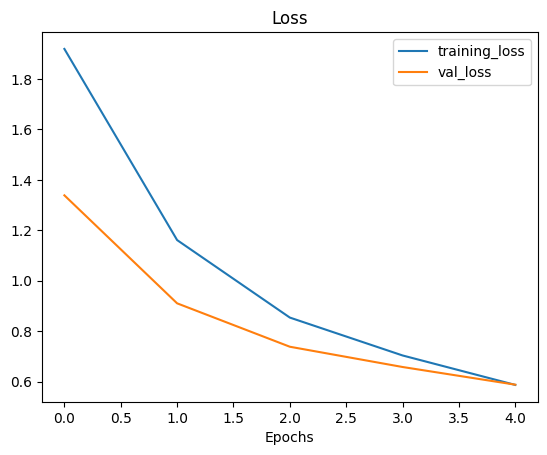

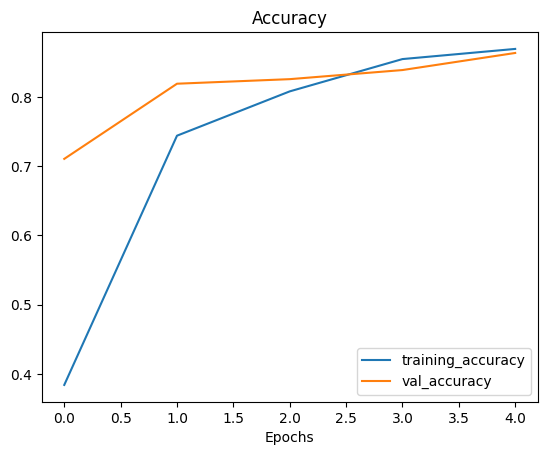

In [ ]:
plot_loss_curves(history_model_0)

## Getting feature vector from trained model

In [ ]:
input_shape = (1, 4, 4, 3)
tf.random.set_seed(42)

input_tensor = tf.random.normal(input_shape)
print(f"{input_tensor}")

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"{global_average_pooled_tensor}")

[[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]
[[-0.09368646 -0.45840445 -0.28855976]]


In [ ]:
# Replicate what GlobalAveragePooling2D in simple code
tf.reduce_mean(input_tensor, axis=[1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

## Running series of transfer learning experiments

1. `model_1` - use feature extraction transfer learning with 1% of the traning data with data augmentation
2. `model_2` - use feature extraction transfer learning with 10% of the traning with data augmentation
3.  `model_3` - fine-tunning  
4. `model_4` - fine-tunning and 100% training data

### Model_1 - Get the data

In [ ]:
# Download and prepare data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")

train_dir = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

--2024-03-03 20:26:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.207, 74.125.134.207, 74.125.139.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   172MB/s    in 0.7s    

2024-03-03 20:26:14 (172 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There a

In [ ]:
IMG_SIZE = (224, 224)

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE,
                                                                 )

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode="categorical",
                                                                 image_size=IMG_SIZE,
                                                                 )

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Model 1 - Model creation with data augmentation inside model creation

**Benefit of this is way of doing data augmentation is it can utilize GPU**

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.Rescaling(1./255)
], name="data_augmentation")

#### Visualize the data augmentation

Text(0.5, 1.0, 'Augmented image')

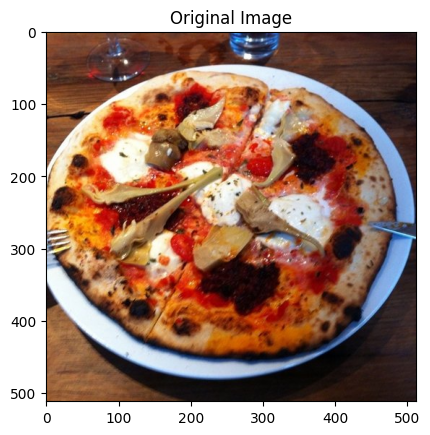

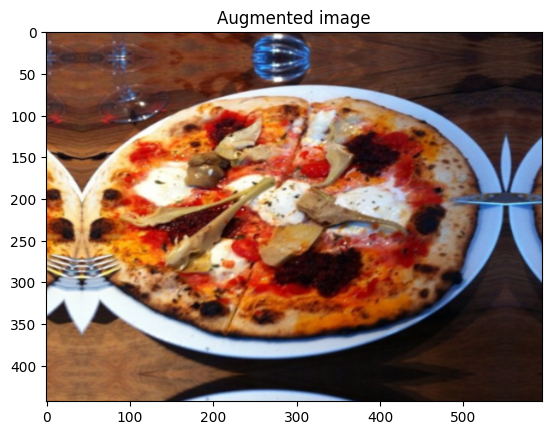

In [ ]:
import os
import random
import matplotlib.image as mpimg

target_class = random.choice(train_data.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title("Original Image")

augmentation_image = data_augmentation(img, training=True)
plt.figure()
plt.imshow(augmentation_image)
plt.title("Augmented image")

### Model 1 - Feature extraction transfer learning on 1% of data

In [ ]:
input_shape = (224, 224, 3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

input_layer = tf.keras.layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(input_layer)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
output_layer = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = tf.keras.Model(input_layer, output_layer)

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_model_1 = model_1.fit(train_data,
                              epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=int(0.25 * len(test_data)),
                              callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                     experiment_name="1_per_data_aug")]
                              )

Saving TensorBoard log files to: transfer_learning/1_per_data_aug/20240303-202626
Epoch 1/5
3/3 [==============================] - 56s 22s/step - loss: 2.3439 - accuracy: 0.1143 - val_loss: 2.3386 - val_accuracy: 0.0987
Epoch 2/5
3/3 [==============================] - 46s 22s/step - loss: 2.3049 - accuracy: 0.1429 - val_loss: 2.3318 - val_accuracy: 0.0872
Epoch 3/5
3/3 [==============================] - 36s 17s/step - loss: 2.3095 - accuracy: 0.1286 - val_loss: 2.3289 - val_accuracy: 0.1053
Epoch 4/5
3/3 [==============================] - 37s 17s/step - loss: 2.3192 - accuracy: 0.1000 - val_loss: 2.3331 - val_accuracy: 0.0954
Epoch 5/5
3/3 [==============================] - 45s 21s/step - loss: 2.3537 - accuracy: 0.0857 - val_loss: 2.3454 - val_accuracy: 0.0938


In [ ]:
model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, 3)           0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                1281

In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 128s 2s/step - loss: 2.3395 - accuracy: 0.1000


[2.3394858837127686, 0.10000000149011612]

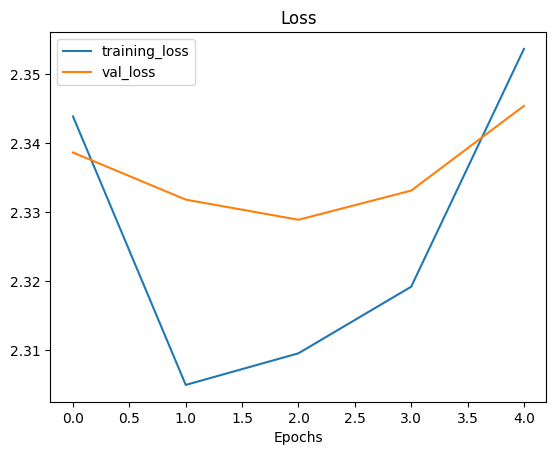

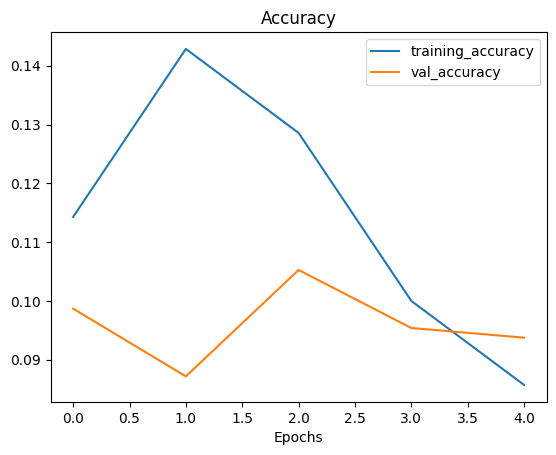

In [ ]:
plot_loss_curves(history_model_1)

### Model 2 - 10% data with data augmentation layer

**What is new? -> Model Checkpoints callbacks and 10% data**

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"
input_shape = (224, 224, 3)
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=IMG_SIZE,
                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode="categorical")

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 image_size=IMG_SIZE,
                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode="categorical")

# Check training data directory
walk_through_dir(train_dir)

# Create checkpoint for model
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                   save_weights_only=True,
                                   save_best_only=False,
                                   save_freq="epoch",
                                   verbose=1)


# Create data augmentation sequential layer
data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
    #preprocessing.Rescaling(1./255)
], name="data_augmentation")


base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Step 1 - Create inputs
input_layer = tf.keras.layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(input_layer)

# Step 2 - Setup Base model
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Step 3 - Create output layer
output_layer = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# Step 4 - combine the layers
model_2 = tf.keras.Model(input_layer, output_layer)

# Compile the model_2
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model_2
history_model_2 = model_2.fit(train_data,
                              epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=int(0.25 * len(test_data)),
                              callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                     experiment_name="1_per_data_aug"),
                                         checkpoint_callback]
                              )




Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_class

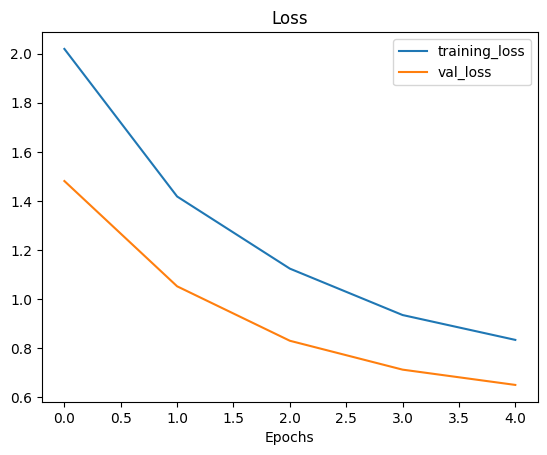

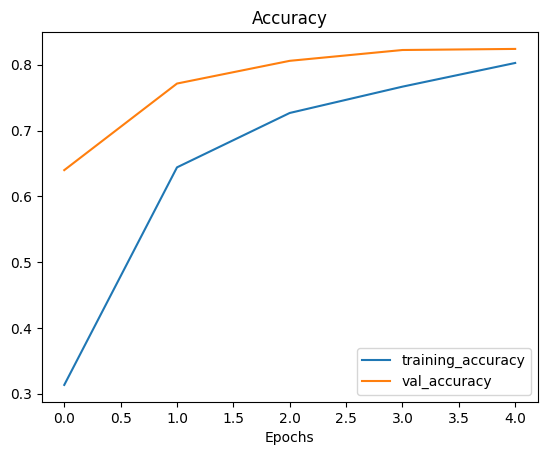

In [ ]:
plot_loss_curves(history_model_2)

In [ ]:
loss, accuracy = model_2.evaluate(test_data)
print(f"Loss of the model is {loss} and accuracy is {accuracy}")

79/79 [==============================] - 132s 2s/step - loss: 0.6586 - accuracy: 0.8208
Loss of the model is 0.6586170792579651 and accuracy is 0.8208000063896179


### Model 2- Loading saved checkpointed weights
**It returns model in specific state**

In [ ]:
model_2.load_weights(checkpoint_path)

In [ ]:
# Evaluate model 2 with loaded weights
loss, accuracy = model_2.evaluate(test_data)
print(f"Loss of the model is {loss} and accuracy is {accuracy}")

79/79 [==============================] - 126s 2s/step - loss: 0.6586 - accuracy: 0.8208
Loss of the model is 0.6586170792579651 and accuracy is 0.8208000063896179


## Model 3 - Fine tunning with weights unfrozen on 10% data

**Before doing fine tunning, it is important generally to perform feature extraction first.**

In [ ]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7862a2003b50> True
<keras.src.engine.sequential.Sequential object at 0x7862a2071930> True
<keras.src.engine.functional.Functional object at 0x7862a1c22d70> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7862a201f2e0> True
<keras.src.layers.core.dense.Dense object at 0x7862a1dc1570> True


In [ ]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_4 False
1 rescaling_4 False
2 normalization_3 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [ ]:
base_model.trainable = True

# Make all layers to False except last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_4 False
1 rescaling_4 False
2 normalization_3 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

### Note: To reduce catastrophic forgetting use smaller learning rate in optimizers

In [ ]:
# We have to recompile model every time we make a change to layers
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [ ]:
model_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

Saving TensorBoard log files to: transfer_learning/10_per_data_aug/20240303-204649
Epoch 5/10
24/24 [==============================] - ETA: 0s - loss: 0.7394 - accuracy: 0.7880
Epoch 5: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 94s 4s/step - loss: 0.7394 - accuracy: 0.7880 - val_loss: 0.4987 - val_accuracy: 0.8421
Epoch 6/10
24/24 [==============================] - ETA: 0s - loss: 0.6227 - accuracy: 0.8173
Epoch 6: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 95s 4s/step - loss: 0.6227 - accuracy: 0.8173 - val_loss: 0.4528 - val_accuracy: 0.8487
Epoch 7/10
24/24 [==============================] - ETA: 0s - loss: 0.5774 - accuracy: 0.8133
Epoch 7: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 93s 4s/step - loss: 0.5774 - accuracy: 0.8133 - val_loss: 0.4617 - val_accuracy: 0.8405
Epoch 8/10


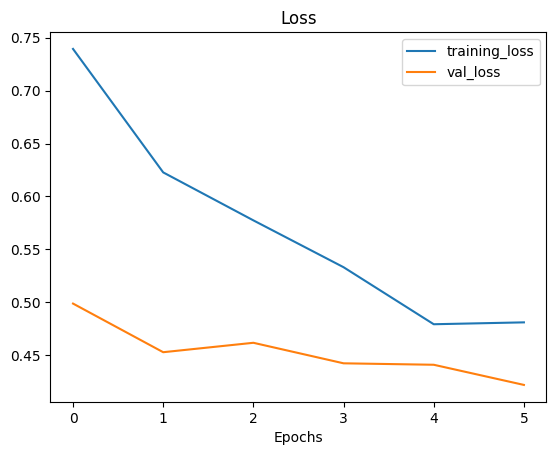

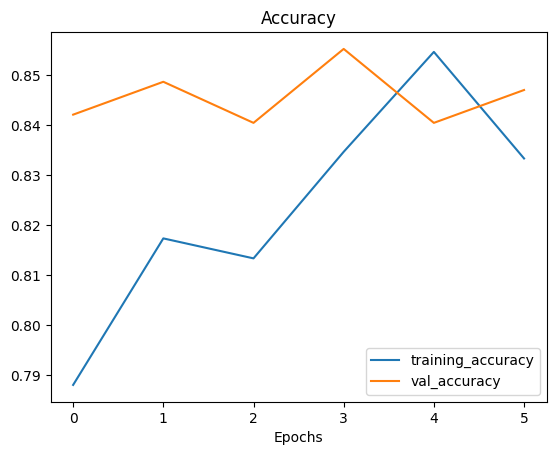

In [ ]:
# FINE TUNNING - Fit the model_2 on 5 more epochs

history_model_2_fine_tuned = model_2.fit(train_data,
                              epochs=10,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=int(0.25 * len(test_data)),
                              initial_epoch=history_model_2.epoch[-1],
                              callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                     experiment_name="10_per_data_aug"),
                                         checkpoint_callback]
                              )
# Plot the curves
plot_loss_curves(history_model_2_fine_tuned)

# Evaluate the fine tunned model on whole test data
loss, accuracy = model_2.evaluate(test_data)
print(f"Loss of the model is {loss} and accuracy is {accuracy}")

## Note
1.**IMP - Catastrophic forgetting while tunning - perform slower learning**
2.**Model Checkpointing**
3.**Feature extraction before Fine tunning model**

## Compare plots of history of before and after fine tunning models

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):

  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label="Training accuracy")
  plt.plot(total_val_acc, label="Val Accuracy")
  plt.plot([5-1, 5-1], plt.ylim(), label="Start fine tunning")
  plt.legend(loc="lower right")
  plt.title("Training and validation accuracy")

  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss, label="Training loss")
  plt.plot(total_val_loss, label="Val loss")
  plt.plot([5-1, 5-1], plt.ylim(), label="Start fine tunning")
  plt.legend(loc="upper right")
  plt.title("Training and validation loss")

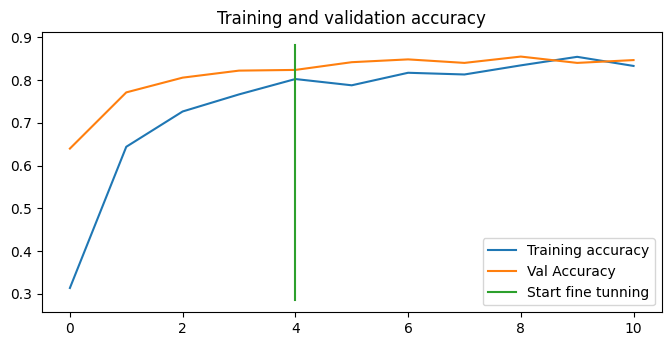

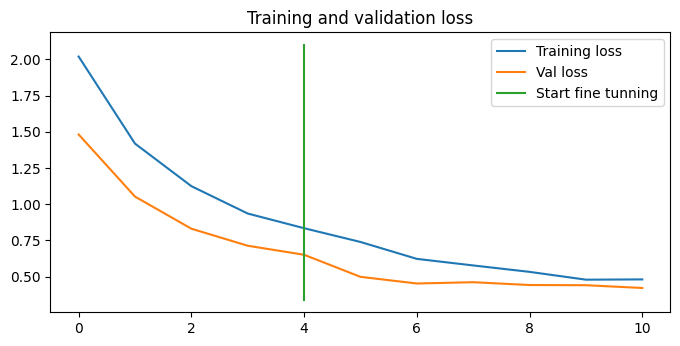

In [ ]:
compare_historys(history_model_2, history_model_2_fine_tuned)

### Model 4 - 100% data

**Get the Data**

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

unzip_data("10_food_classes_all_data.zip")
train_dir_all_data = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

walk_through_dir("10_food_classes_all_data/train")


--2024-03-03 20:58:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.12.207, 108.177.13.207, 74.125.26.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  55.0MB/s    in 10s     

2024-03-03 20:58:56 (49.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]

There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images 

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

input_shape = (224, 224, 3)
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                 image_size=IMG_SIZE,
                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode="categorical")

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 image_size=IMG_SIZE,
                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode="categorical")
# Load feature extraction model
model_2.load_weights(checkpoint_path)

# No need to unfreez the weights because it has been already done in
# previous steps

# Compile the model_2
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

# Fit the model_2
history_model_4 = model_2.fit(train_data_full,
                              epochs=5,
                              steps_per_epoch=len(train_data_full),
                              validation_data=test_data,
                              validation_steps=int(0.25 * len(test_data)),
                              callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                     experiment_name="1_per_data_aug"),
                                         checkpoint_callback]
                              )

# Evaluate the model on all test data
model_2.evaluate(test_data)

# Plot the comparision of histories
compare_historys(history_model_4, history_model_2_fine_tuned)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.
Saving TensorBoard log files to: transfer_learning/1_per_data_aug/20240303-205909
Epoch 1/5
 58/235 [======>.......................] - ETA: 6:44 - loss: 0.6392 - accuracy: 0.7974

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir transfer_learning/